In [1]:
import numpy as np
import pandas as pd
from sgr_tools.ScenarioGeneration import BlockBootstrap
# autoreload
%load_ext autoreload
%autoreload 2

### Create sample data

In [2]:
# create sample data
n_timesteps = 8760
df = pd.DataFrame({
    'Wind-power': np.random.normal(size=n_timesteps),
    'PV': np.random.normal(size=n_timesteps),
})
df.index = pd.date_range('2030-01-01', periods=n_timesteps, freq='H')
df.head()

,Wind-power,PV
2030-01-01 00:00:00,0.976498,-1.993191
2030-01-01 01:00:00,0.082913,-0.371948
2030-01-01 02:00:00,0.996504,0.025549
2030-01-01 03:00:00,-0.454262,-0.549286
2030-01-01 04:00:00,-0.516179,-0.120587


### Generate scenarios

In [3]:
# number of scenarios generated
block_bootstrap = BlockBootstrap(df)

scenarios = block_bootstrap.generate_scenarios(
    n_scenarios=10, # generate 10 scenarios
    block_size=168, # block size of 168 hours (1 week) 
    target_indices=pd.date_range('2050-01-01', periods=8760, freq='H'), # generate 1 year of hourly data for 2050
    months_of_year_sets=[(12, 1, 2), (3, 4, 5), (6, 7, 8), (9, 10, 11)], # winter, spring, summer, fall
    days_of_week_sets=[(0, 1, 2, 3, 4), (5, 6)], # weekdays, weekends
)


### Plot first scenario

<Axes: >

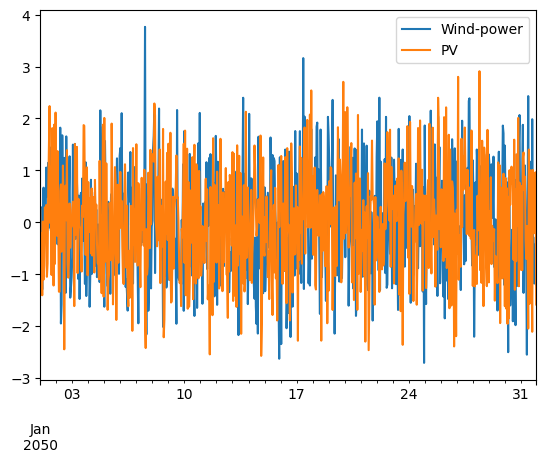

In [4]:
scenarios[0].iloc[:744,:].plot()